3. Using the ACUCO symbols, align and orient the photograph

(-0.5, 2891.5, 3629.5, -0.5)

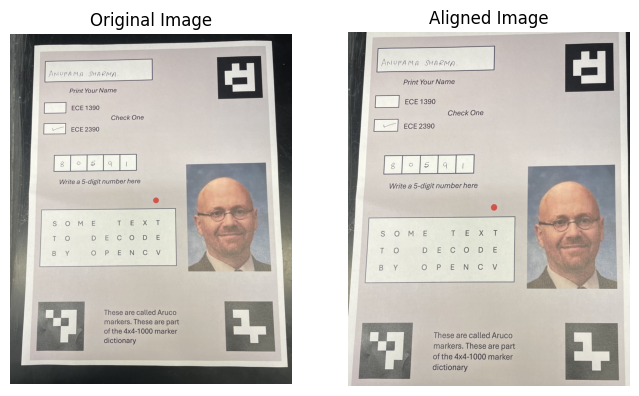

In [1]:
import cv2
import matplotlib.pyplot as plt
import cv2.aruco as aruco
import numpy as np

#load the image
img_org = cv2.imread("/content/Homework8.jpg")
img = cv2.imread("/content/Image.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_org = cv2.cvtColor(img_org, cv2.COLOR_BGR2GRAY)
img_org_rgb = cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB)

# Load ArUco dictionary and parameters
aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_4X4_1000)
parameters = aruco.DetectorParameters()

#Detect markers in the image
detector = aruco.ArucoDetector(aruco_dict, parameters)
corners, ids , _ = detector.detectMarkers(gray)
corners_org, ids_org ,_ = detector.detectMarkers(gray_org)

src_pts = [corner1[0][0] for corner1 in corners[:3]]
dst_pts = [corner2[0][0] for corner2 in corners_org[:3]]

matrix = cv2.getAffineTransform(np.float32(src_pts), np.float32(dst_pts))
aligned_img = cv2.warpAffine(img_rgb, matrix,(img_org_rgb.shape[1], img_org.shape[0]))

#Display the Original and Aligned Images
plt.figure(figsize=(8,5))
plt.subplot(121);plt.imshow(img_rgb);plt.title("Original Image");plt.axis('off')
plt.subplot(122);plt.imshow(aligned_img);plt.title("Aligned Image");plt.axis('off')

4. Using EasyOCR, read in the name box that you wrote

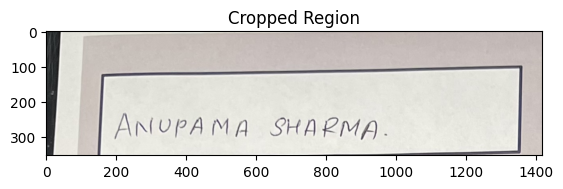

OCR Results for the Text Box:
Detected text: 'AnvpA MA' with confidence: 0.83
Detected text: 'SHAPma_' with confidence: 0.69


In [4]:
import easyocr

# Constants
dpi = 300
cm_to_pixels = dpi/ 2.54

# Function to crop a region from an image
def crop_region(image, region_width_cm, region_height_cm, region_offset_x_cm, region_offset_y_cm, cm_to_pixels):
    image_width_pixels = image.shape[1]
    image_height_pixels = image.shape[0]
    image_center_x = image_width_pixels // 2
    image_center_y = image_height_pixels // 2

    region_width_pixels = int(region_width_cm * cm_to_pixels)
    region_height_pixels = int(region_height_cm * cm_to_pixels)
    region_x_pixels = int(region_offset_x_cm * cm_to_pixels + image_center_x)
    region_y_pixels = int(region_offset_y_cm * cm_to_pixels + image_center_y)

    cropped_region = image[
        region_y_pixels:region_y_pixels + region_height_pixels,
        region_x_pixels:region_x_pixels + region_width_pixels
    ]
    return cropped_region

# Crop a region from the image
cropped_text_box = crop_region(aligned_img, 12, 3, -11, -15, cm_to_pixels)

# Display the cropped region
plt.imshow(cropped_text_box, cmap='gray');plt.title("Cropped Region")
plt.show()

# Initialize the OCR reader
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_text_box)

# Print OCR results
print("OCR Results for the Text Box:")
for detected_text, text_content, confidence_score in result:
    print(f"Detected text: '{text_content}' with confidence: {confidence_score:.2f}")

5. Write code to check which of the two checkboxes is marked by comparing the intensity in the two boxes

Text(0.5, 1.0, 'ECE 2390 Box')

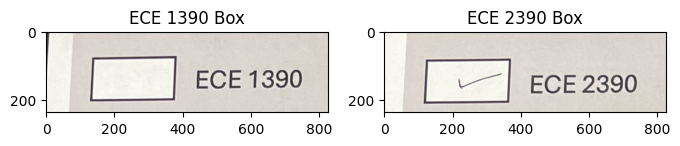

In [5]:
# Crop regions for ECE 1390 and ECE 2390 boxes
ece_1390_box = crop_region(aligned_img, 7, 2, -11, -10.5, cm_to_pixels)
ece_2390_box = crop_region(aligned_img, 7, 2, -11, -8.5, cm_to_pixels)

# Display the ECE 1390 region
plt.figure(figsize=(8, 5))
plt.subplot(121);plt.imshow(ece_1390_box, cmap='gray');plt.title('ECE 1390 Box')
plt.subplot(122);plt.imshow(ece_2390_box, cmap='gray');plt.title('ECE 2390 Box')


In [6]:
# Calculate the mean intensity for each cropped region
ece_1390_intensity = np.mean(ece_1390_box)
ece_2390_intensity = np.mean(ece_2390_box)

# Print the calculated intensities (optional for debugging purposes)
print(f"ECE 1390 Intensity: {ece_1390_intensity}")
print(f"ECE 2390 Intensity: {ece_2390_intensity}")

# Determine which box has higher intensity, and thus which box is selected
if ece_1390_intensity > ece_2390_intensity:
    print("Selected: ECE-1390")
else:
    print("Selected: ECE-2390")


ECE 1390 Intensity: 211.64326069410816
ECE 2390 Intensity: 213.11844913202282
Selected: ECE-2390


6. Using the example from class on OCR-digits, decode the 5 numbers you wrote

[8, None, 5, None, None]


Text(0.5, 1.0, 'Digit 5')

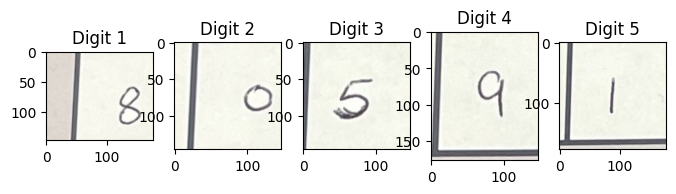

In [7]:
# Initialize the EasyOCR reader
reader = easyocr.Reader(['en'])

# Crop regions for the 5 digits
digit_1 = crop_region(aligned_img, 1.5, 1.25, -9.5, -4.5, cm_to_pixels)
digit_2 = crop_region(aligned_img, 1.25, 1.25, -7.75, -4.5, cm_to_pixels)
digit_3 = crop_region(aligned_img, 1.25, 1.25, -6, -4.5, cm_to_pixels)
digit_4 = crop_region(aligned_img, 1.25, 1.5, -4.5, -4.5, cm_to_pixels)
digit_5 = crop_region(aligned_img, 1.5, 1.5, -3, -4.5, cm_to_pixels)

# Store the cropped digits in a list
data = [digit_1, digit_2, digit_3, digit_4, digit_5]

# List to store the digits detected
digits = []

# Loop through the cropped regions and use OCR to extract the digits
for i in range(5):
    result = reader.readtext(data[i])

    # Ensure the OCR result is valid and append the detected digit (as integer)
    if result:
        detected_digit = result[0][1]
        try:
            digits.append(int(detected_digit))  # Convert the detected text to an integer
        except ValueError:
            digits.append(None)  # If the result is not a valid number, append None
    else:
        digits.append(None)

# Print the extracted digits
print(digits)

# Display Digit 1
plt.figure (figsize=(8, 5))
plt.subplot(151);plt.imshow(digit_1, cmap='gray');plt.title("Digit 1")
# Display Digit 2
plt.subplot(152);plt.imshow(digit_2, cmap='gray');plt.title("Digit 2")
# Display Digit 3
plt.subplot(153);plt.imshow(digit_3, cmap='gray');plt.title("Digit 3")
# Display Digit 4
plt.subplot(154);plt.imshow(digit_4, cmap='gray');plt.title("Digit 4")
# Display Digit 5
plt.subplot(155);plt.imshow(digit_5, cmap='gray');plt.title("Digit 5")


7. Using Tesseract-OCR, read the printed text box ("some test to decode by openCV')

In [ ]:
import pytesseract

# Set Tesseract executable path for Colab
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

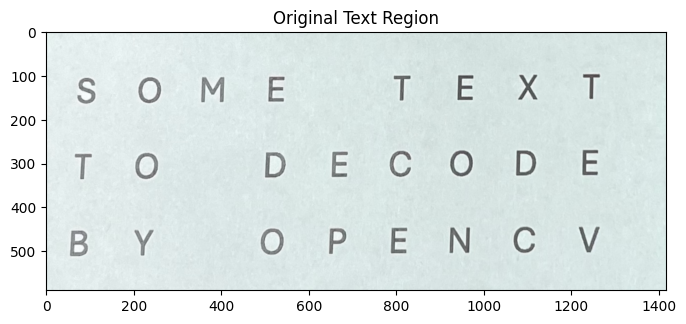

Recognized Text:
S OM E T E X T
T O D ECO D E
B Y O P EN C V



In [61]:
# Define DPI and conversion function
dpi = 300
convert_to_px = lambda cm: int((cm / 2.54) * dpi)

def crop_area(img, x_offset, y_offset, width_cm, height_cm):
    """
    Crop a specific region from the image given its dimensions in cm.
    """
    x_coord = convert_to_px(x_offset) + img.shape[1] // 2
    y_coord = convert_to_px(y_offset) + img.shape[0] // 2
    width_px = convert_to_px(width_cm)
    height_px = convert_to_px(height_cm)

    # Crop the region while ensuring bounds
    return img[max(0, y_coord):y_coord + height_px, max(0, x_coord):x_coord + width_px]

# Crop the text box region
text_region = crop_area(aligned_img, -10, 1, 12, 5)

# Convert the cropped region to grayscale and apply thresholding
gray_region = cv2.cvtColor(text_region, cv2.COLOR_BGR2GRAY)
_, binary_region = cv2.threshold(gray_region, 128, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Use Tesseract to extract text
ocr_config = r'--psm 6'  # Set Tesseract mode
recognized_text = pytesseract.image_to_string(binary_region, config=ocr_config)

# Display the image above the extracted text
plt.figure(figsize=(8, 5))
plt.imshow(cv2.cvtColor(text_region, cv2.COLOR_BGR2RGB))
plt.title("Original Text Region")
plt.show()

# Print the recognized text
print("Recognized Text:")
print(recognized_text)


8.  Using MediaPipe, find the facial features for the image of Dr Huppert and draw the markers on the image.

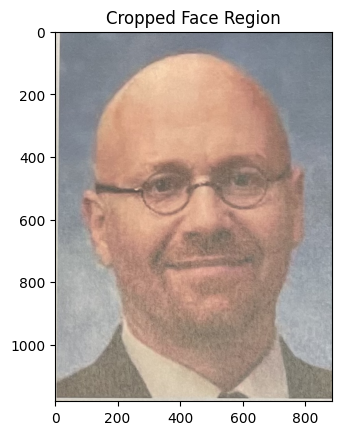

In [8]:
# Crop the region containing the face (from the aligned image)
face_box = crop_region(
    aligned_img,
    region_width_cm=7.5,
    region_height_cm=10,
    region_offset_x_cm=3.25,
    region_offset_y_cm=-3,
    cm_to_pixels=cm_to_pixels
)

# Display the cropped face region
plt.imshow(face_box, cmap='gray')
plt.title("Cropped Face Region")
plt.show()

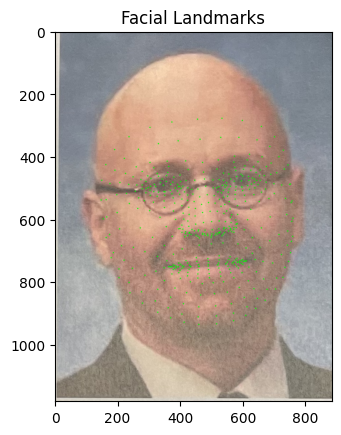

In [10]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# Check if face_box is grayscale (1 channel) or RGB (3 channels)
if len(face_box.shape) == 2:
    rgb_face_box = cv2.cvtColor(face_box, cv2.COLOR_GRAY2RGB)
else:
    rgb_face_box = face_box

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh_detector = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True
)

# Detect facial landmarks
face_detection_results = face_mesh_detector.process(rgb_face_box)

# Draw landmarks on the face if detected
if face_detection_results.multi_face_landmarks:
    for detected_face in face_detection_results.multi_face_landmarks:
        for landmark_id, landmark in enumerate(detected_face.landmark):
            # Get the height and width of the image
            image_height, image_width = rgb_face_box.shape[:2]
            # Calculate the coordinates of each landmark
            x_coord, y_coord = int(landmark.x * image_width), int(landmark.y * image_height)
            # Draw a circle at the landmark
            cv2.circle(rgb_face_box, (x_coord, y_coord), radius=2, color=(0, 255, 0), thickness=-1)

# Display the face region with landmarks
plt.imshow(rgb_face_box)
plt.title("Facial Landmarks")
plt.show()
